# Professor Proposes

### Executive summary

A professor of machine learning plans to tie the knot with his longtime partner. This is his first time shopping for diamonds. While browsing the mall, he came across a dizzying array of diamond qualities, configurations, and prices. Based on his quick search, he found that diamonds are primarily characterized by 4C: cut, colour, clarity, and carat besides Polish, Symmetry, and certification. In order to avoid getting cheated while purchasing the diamond ring, he ran a web scrape of three different wholesaler websites to compile his pricing model. Estimate the price of a diamond ring of his choice using a Linear Regression Model.

Issues and challenges: 

* Identify Determinants of Price
* Distribution of data
* Univariate Analysis of characteristics of diamonds 
* Finding the Correlation, Covariance between price and all the characteristics of diamonds 
* Creating a regression model to predict the price of a diamond ring 

As 4Cs are the best determinants of the quality of a diamond, the professor needs to run the analysis focusing on 4Cs and other important characteristics such as Polish and certification. 

In [1]:
import pandas as pd

In [2]:
dataset_professor_raw = pd.read_csv("https://raw.githubusercontent.com/sumitraju/data-science/main/professor_proposes/data/data.csv")
dataset_professor = dataset_professor_raw.copy()

In [3]:
datset_replace_dollar = dataset_professor["Price"].copy()
datset_replace_dollar = datset_replace_dollar.str.replace('$', '',regex=True)
datset_replace_dollar = datset_replace_dollar.str.replace(',', '',regex=True)
datset_replace_dollar = pd.to_numeric(datset_replace_dollar)
dataset_professor["Price_updated"] = datset_replace_dollar
dataset_professor.head(5)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler,Price_updated
0,0.92,I,SI2,G,AGS,V,V,"$3,000",1.0,3000.0
1,0.92,I,SI2,V,AGS,G,G,"$3,000",1.0,3000.0
2,0.82,F,SI2,I,GIA,X,X,"$3,004",1.0,3004.0
3,0.81,G,SI1,I,GIA,X,V,"$3,004",1.0,3004.0
4,0.90,J,VS2,V,GIA,V,V,"$3,006",1.0,3006.0


In [4]:
Wholesaler_type_change = pd.Series(dataset_professor["Wholesaler"], dtype="Int64")
Wholesaler_type_change = pd.to_numeric(Wholesaler_type_change, downcast="integer")
Wholesaler_type_change = Wholesaler_type_change.astype(str)
dataset_professor["Wholesaler"] = Wholesaler_type_change


In [5]:
dataset_professor = dataset_professor.drop(columns=['Price'])
dataset_professor.head(5)

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Wholesaler,Price_updated
0,0.92,I,SI2,G,AGS,V,V,1,3000.0
1,0.92,I,SI2,V,AGS,G,G,1,3000.0
2,0.82,F,SI2,I,GIA,X,X,1,3004.0
3,0.81,G,SI1,I,GIA,X,V,1,3004.0
4,0.90,J,VS2,V,GIA,V,V,1,3006.0


### Exploratory Data Analysis

In [6]:
dataset_professor.shape

(441, 9)

In [7]:
dataset_professor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Carat          440 non-null    float64
 1   Colour         440 non-null    object 
 2   Clarity        440 non-null    object 
 3   Cut            440 non-null    object 
 4   Certification  440 non-null    object 
 5   Polish         440 non-null    object 
 6   Symmetry       440 non-null    object 
 7   Wholesaler     441 non-null    object 
 8   Price_updated  440 non-null    float64
dtypes: float64(2), object(7)
memory usage: 31.1+ KB


In [8]:
dataset_professor.describe(include='object')

,Colour,Clarity,Cut,Certification,Polish,Symmetry,Wholesaler
count,440,440,440,440,440,440,441
unique,9,9,5,5,6,5,4
top,I,SI1,X,GIA,V,V,3
freq,79,116,149,265,203,206,200


In [9]:
dataset_professor.describe(include='float64')

,Carat,Price_updated
count,440.00000,440.000000
mean,0.66925,1716.738636
std,0.37980,1175.689127
min,0.09000,160.000000
25%,0.30000,520.000000
50%,0.81000,2169.000000
75%,1.01000,3012.500000
max,1.58000,3145.000000


In [10]:
dataset_professor.isna().sum()

Carat            1
Colour           1
Clarity          1
Cut              1
Certification    1
Polish           1
Symmetry         1
Wholesaler       0
Price_updated    1
dtype: int64

In [11]:
nan_value = float("NaN")
dataset_professor.replace("", nan_value, inplace=True)
dataset_professor.dropna(subset = ["Price_updated"], inplace=True)
dataset_professor.isna().sum()

Carat            0
Colour           0
Clarity          0
Cut              0
Certification    0
Polish           0
Symmetry         0
Wholesaler       0
Price_updated    0
dtype: int64

In [12]:
!pip install statsmodels==0.13.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 36.0 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [13]:
dataset_professor_clean=dataset_professor.copy()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

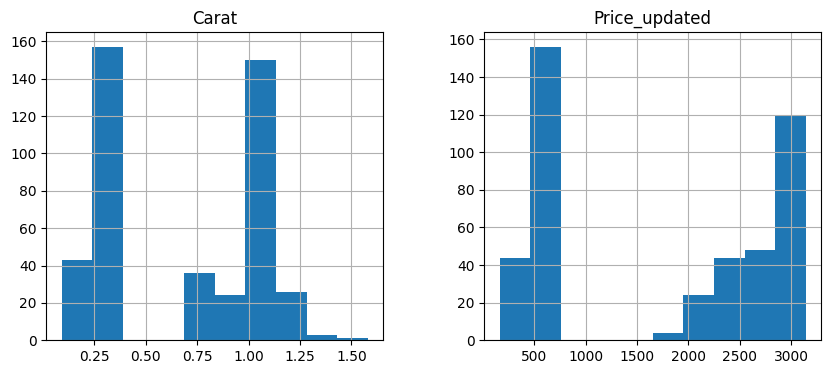

In [15]:
dataset_professor_clean.hist(figsize=(10,4), column=["Carat", "Price_updated"])
plt.show()

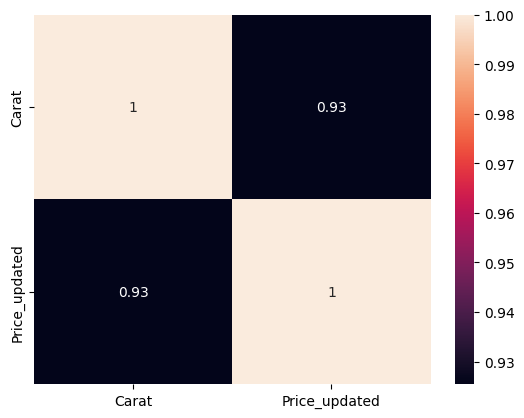

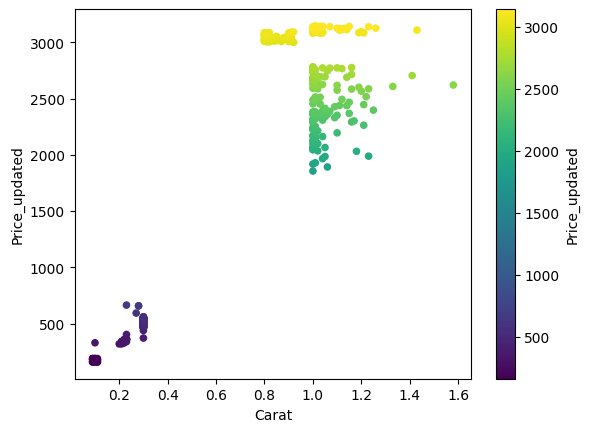

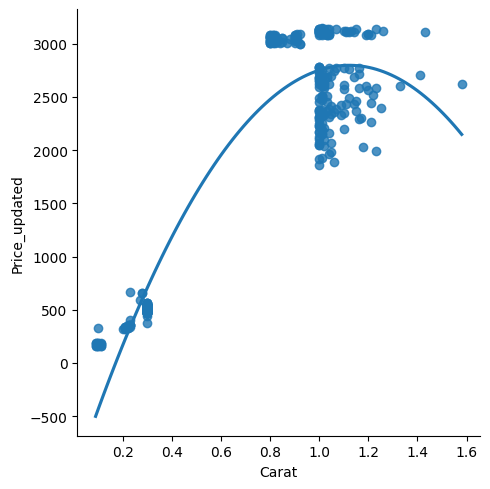

In [20]:
cor = dataset_professor_clean[["Carat","Price_updated"]].corr()
sns.heatmap(cor, annot=True)
plt.show()
dataset_professor_clean[["Carat","Price_updated"]].plot.scatter(x="Carat",y="Price_updated",c="Price_updated", colormap='viridis')
plt.show()
sns.lmplot(x ="Carat", y ="Price_updated", data = dataset_professor_clean, order = 2, ci = None)
plt.show()

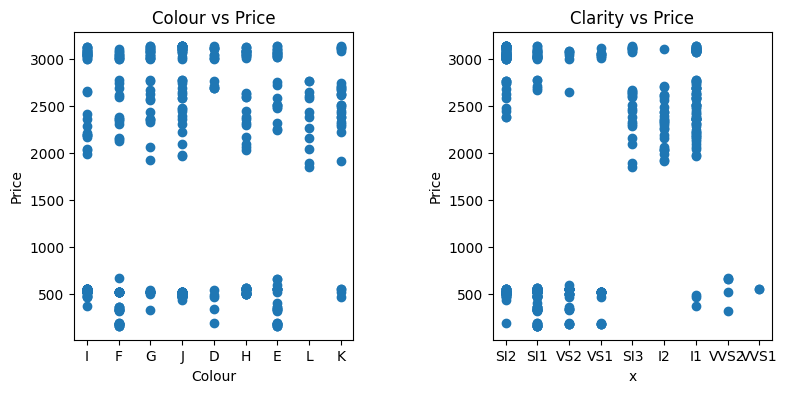

In [17]:
fig = plt.figure(figsize=(9,4))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title('Colour vs Price')
ax1.set_xlabel('Colour')
ax1.set_ylabel('Price')

ax2.set_title('Clarity vs Price')
ax2.set_xlabel('x')
ax2.set_ylabel('Price')

ax1.scatter(dataset_professor_clean['Colour'],dataset_professor_clean['Price_updated'])
ax2.scatter(dataset_professor_clean['Clarity'],dataset_professor_clean['Price_updated'])
plt.show()

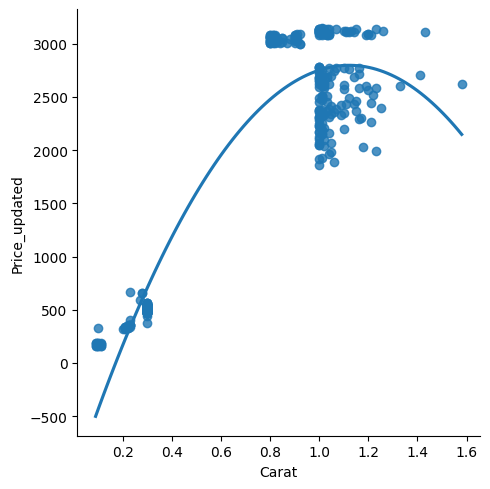

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cedfd35-f7a7-4cb1-b381-fa8608f1c5bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>